In [6]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [26]:
print(y[9])

9


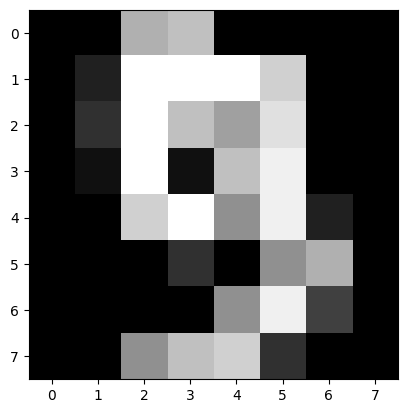

In [27]:
import matplotlib.pyplot as plt
X_image = X[9].reshape(8, 8)
plt.imshow(X_image, cmap='gray')

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
rf.score(X_test, y_test)

0.9722222222222222

In [55]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_gd = GridSearchCV(rf, params, n_jobs=-1, cv=3)

In [56]:
rf_gd.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]})

In [57]:
rf_gd.best_estimator_.score(X_test, y_test)

0.9722222222222222

In [58]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_jobs=-1)

In [59]:
kn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [60]:
kn.score(X_test, y_test)

0.9861111111111112

In [76]:
paramsKN = {
    'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

kn_gd = GridSearchCV(kn, paramsKN, cv=3)

In [77]:
kn_gd.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15],
                         'weights': ['uniform', 'distance']})

In [78]:
kn.score(X_test, y_test)

0.9861111111111112

In [79]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ('random_forest', rf),
    ('knn', kn)
]

vc = VotingClassifier(estimators)

In [80]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier(n_jobs=-1))])

In [81]:
vc.score(X_test, y_test)
#Ficou pior que o KN sozinho

0.9833333333333333

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

ext = ExtraTreesClassifier(n_jobs=-1)

In [83]:
ext.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1)

In [84]:
ext.score(X_test, y_test) 
#melhor que o Random Forest mas pior que o KNN

0.9777777777777777

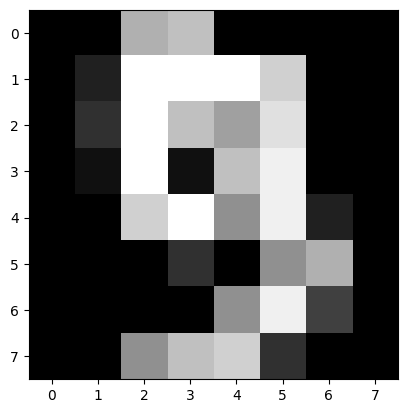

In [85]:
plt.imshow(X_image, cmap='gray')

In [94]:
prediction = kn.predict(X[9].reshape(1, -1))
print(prediction)

[9]


In [95]:
print(X[9])

[ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
 16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
  9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
  4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]


In [141]:
new_nine = []
for pixel in X[9]:
    if pixel >= 12:
        new_nine.append(int(pixel))
    else:
        new_nine.append(0)

print(new_nine)

[0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 16, 16, 16, 13, 0, 0, 0, 0, 16, 12, 0, 14, 0, 0, 0, 0, 16, 0, 12, 15, 0, 0, 0, 0, 13, 16, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 12, 13, 0, 0, 0]


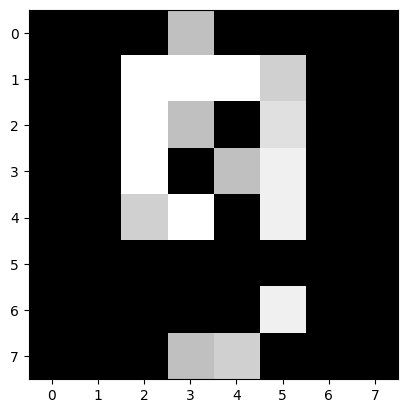

In [142]:
import numpy as np

new_nine_matrix = np.array(new_nine).reshape(8, 8)
plt.imshow(new_nine_matrix, cmap='gray')

In [132]:
X_new_train = []
y_new_train = []

for image, target in zip(X_train, y_train):
    new_image = []
    for pixel in image:
        if pixel >= 12:
            new_image.append(int(pixel))
        else:
            new_image.append(0)
    new_image_matrix = np.array(new_image)
    X_new_train.append(new_image_matrix)
    y_new_train.append(target)
print(X_new_train[0])
print(y_new_train[0])

[ 0  0  0 14  0  0  0  0  0  0 12 12  0  0  0  0  0  0 16  0  0  0  0  0
  0  0 16  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0 16  0 12 15  0  0
  0  0 14 13  0 13  0  0  0  0  0  0 16 13  0  0]
6


In [133]:
X_combined = np.concatenate((X_train, X_new_train), axis=0)
y_combined = np.concatenate((y_train, y_new_train), axis=0)

In [134]:
new_kn = KNeighborsClassifier(n_jobs=-1)

In [135]:
new_kn.fit(X_combined, y_combined)

KNeighborsClassifier(n_jobs=-1)

In [136]:
new_kn.score(X_test, y_test)

0.9861111111111112

In [137]:
new_kn_gd = GridSearchCV(new_kn, paramsKN, cv=5)

In [138]:
new_kn_gd.fit(X_combined, y_combined)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15],
                         'weights': ['uniform', 'distance']})

In [140]:
new_kn_gd.score(X_test, y_test)

0.9777777777777777

In [143]:
#Tentei fazer manipulações nos dados para criar um dataset maior mas no fim as alterações nao surtiram efeito 

In [156]:
digit_3 = np.array([
    [0, 0, 0, 16, 16, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 16, 16, 16, 0, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 16, 16, 0, 0],
    [0, 0, 0, 16, 16, 16, 0, 0]
]) #array de um número aleatório criado pelo chatgpt

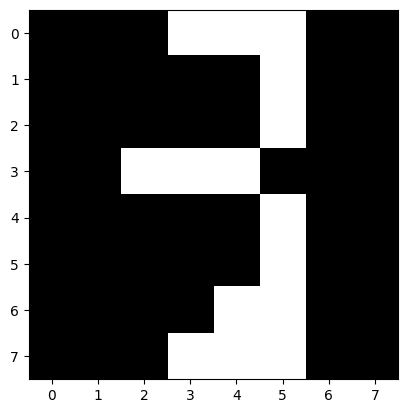

In [157]:
plt.imshow(digit_3, cmap='gray')

In [158]:
print(new_kn.predict(digit_3.reshape(1, -1)))

[3]
